<a href="https://colab.research.google.com/github/rahiakela/python-for-programmers-practice/blob/natural-language-processing/visualizing_word_frequency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VISUALIZING WORD FREQUENCIES WITH BAR CHARTS AND WORD CLOUDS

There’s often more than one way to visualize
data, and sometimes one is superior to others. For example, you might be interested in word
frequencies relative to one another, or you may just be interested in relative uses of words in
a corpus. In this section, we’ll look at two ways to visualize word frequencies:
* A bar chart that quantitatively visualizes the top 20 words in Romeo and Juliet as bars representing each word and its frequency.
* A word cloud that qualitatively visualizes more frequently occurring words in bigger fonts and less frequently occurring words in smaller fonts.

Let’s visualize Romeo and Juliet’s top 20 words that are not stop words. To do this, we’ll use
features from TextBlob, NLTK and pandas. Pandas visualization capabilities are based on
Matplotlib:

## Setup

In [6]:
import textblob
from textblob import TextBlob
from pathlib import Path

!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


## Loading the Data

In [0]:
blob = TextBlob(Path('romeo-and-juliet.txt').read_text())

 Download NLTK:

In [1]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Next, load the NLTK stopwords:

In [0]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

## Getting the Word Frequencies

To visualize the top 20 words, we need each word and its frequency.

In [0]:
items = blob.word_counts.items()

## Eliminating the Stop Words

Next, let’s use a list comprehension to eliminate any tuples containing stop words

In [12]:
items = [item for item in items if item[0] not in stop_words]
items[:5]

[('\ufeff', 1), ('ebook', 2), ('one', 70), ('project', 28), ('gutenberg', 22)]

## Sorting the Words by Frequency

To determine the top 20 words, let’s sort the tuples in items in descending order by frequency. We can use builtin function sorted with a key argument to sort the tuples by the frequency element in each tuple. To specify the tuple element to sort by, use the itemgetter function from the Python Standard Library’s operator module:

In [15]:
from operator import itemgetter

sorted_items = sorted(items, key=itemgetter(1), reverse=True)
sorted_items[:5]

[('and', 774), ('the', 748), ('i', 656), ('to', 580), ('a', 484)]

## Getting the Top 20 Words

we use a slice to get the top 20 words from sorted_items. When TextBlob
tokenizes a corpus, it splits all contractions at their apostrophes and counts the total number
of apostrophes as one of the “words.”

In [16]:
sorted_items[0]

('and', 774)

In [17]:
top20 = sorted_items[1:21]
top20

[('the', 748),
 ('i', 656),
 ('to', 580),
 ('a', 484),
 ('of', 476),
 ('is', 425),
 ('that', 373),
 ('my', 360),
 ('in', 328),
 ('you', 327),
 ('not', 298),
 ('s', 291),
 ('thou', 278),
 ('with', 268),
 ('for', 267),
 ('me', 265),
 ('this', 260),
 ('it', 237),
 ('be', 235),
 ('d', 224)]

## Convert top20 to a DataFrame

let’s convert the top20 list of tuples to a pandas DataFrame so we can visualize it conveniently.

In [0]:
import pandas as pd

In [21]:
df = pd.DataFrame(top20, columns=['word', 'count'])
df

,word,count
0,the,748
1,i,656
2,to,580
3,a,484
4,of,476
5,is,425
6,that,373
7,my,360
8,in,328
9,you,327


## Visualizing the DataFrame

To visualize the data, we’ll use the bar method of the DataFrame’s plot property. The arguments indicate which column’s data should be displayed along the x and y axes, and that we do not want to display a legend on the graph:

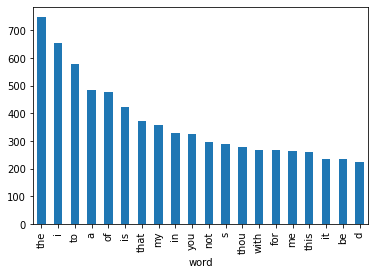

In [23]:
axes = df.plot.bar(x='word', y='count', legend=False)

When you look at the initial bar chart that appears, you’ll notice that some of the words are
truncated. To fix that, use Matplotlib’s gcf (get current figure) function to get the Matplotlib
figure that pandas displayed, then call the figure’s tight_layout method. This compresses
the bar chart to ensure all its components fit:

In [24]:
import matplotlib.pyplot as plt

plt.gcf().tight_layout()

<Figure size 432x288 with 0 Axes>

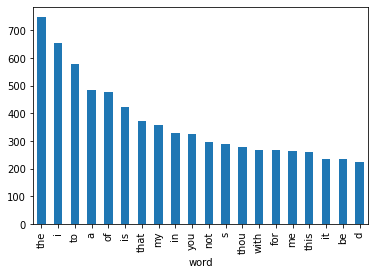

In [28]:
axes = df.plot.bar(x='word', y='count', legend=False)

# READABILITY ASSESSMENT WITH TEXTATISTIC

An interesting use of natural language processing is assessing text readability, which is affected by the vocabulary used, sentence structure, sentence length, topic and more.

In this section, we’ll use the Textatistic library to assess readability. There are many formulas used in natural language processing to calculate readability. Textatistic uses five popular readability formulas—Flesch Reading Ease, FleschKincaid, Gunning Fog, Simple
Measure of Gobbledygook (SMOG) and DaleChall.

In [32]:
!pip install textatistic

  Created wheel for textatistic: filename=textatistic-0.0.1-cp36-none-any.whl size=29057 sha256=0c98619dbc97cdd033550fc3dad2d22ce805c0f9273dbb252d88dbec5cb41857
  Stored in directory: /root/.cache/pip/wheels/1d/ec/34/69c3cae349149cd91552c4c470efcbd08bbd21ba30b12e08ab
  Created wheel for pyhyphen: filename=PyHyphen-3.0.1-cp36-cp36m-linux_x86_64.whl size=57907 sha256=b351a3d0794f08fd97940c594365f90128ea39c1df096ba24dc7377f4ffa1ed3
  Stored in directory: /root/.cache/pip/wheels/85/46/93/46c556b5f054568b7470c86c4f76ea628a9a8bdf5a355b9c63
Successfully built textatistic pyhyphen


## Calculating Statistics and Readability Scores

First, let’s load Romeo and Juliet into the text variable

In [0]:
text = Path('romeo-and-juliet.txt').read_text()

Calculating statistics and readability scores requires a Textatistic object that’s initialized
with the text you want to assess:

In [34]:
from textatistic import Textatistic

readability = Textatistic(text)
readability

In [35]:
%precision 3
'%.3f'

'%.3f'

In [36]:
readability.dict()

{'char_count': 121931,
 'dalechall_score': 7.367,
 'flesch_score': 100.642,
 'fleschkincaid_score': 1.217,
 'gunningfog_score': 4.127,
 'notdalechall_count': 5883,
 'polysyblword_count': 638,
 'sent_count': 3472,
 'smog_score': 5.578,
 'sybl_count': 32308,
 'word_count': 27878}

Each of the values in the dictionary is also accessible via a Textatistic property of the same name as the keys shown in the preceding output. The statistics produced include:
* char_count—The number of characters in the text.
* word_count—The number of words in the text.
* sent_count—The number of sentences in the text.
* sybl_count—The number of syllables in the text.

In [38]:
readability.char_count

121931

In [39]:
readability.word_count

27878

In [40]:
readability.sent_count

3472